## Projeto 3 - SCC0275 - Introdução à Ciência de Dados

### Nome: Nilo Conrado Messias Alves Cangerana
### Número USP: 9805362

In [2]:
#imports
import platform
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
print("Versão Python utilizada: ",platform.python_version()) 

Versão Python utilizada:  3.7.9


## Questão 1

#### a)

In [4]:
#Carregar hour.csv
df_hour = pd.read_csv('hour.csv')

In [5]:
#Visualização das 20 primeiras linhas
df_hour.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### b)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

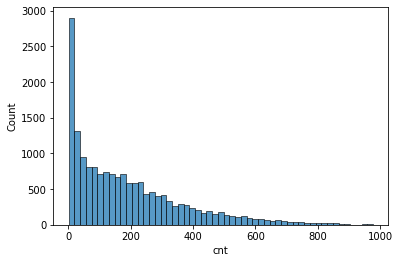

In [7]:
#A variavel resposta do problema é representada na coluna cnt e indica o total de bicicletas alugadas

#histograma
sns.histplot(data=df_hour, x="cnt")

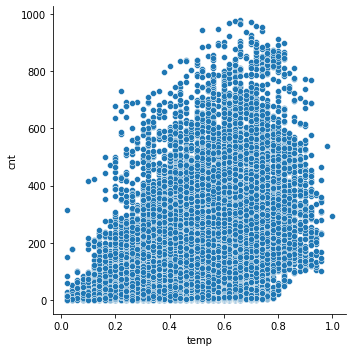

In [8]:
#Gráfico que mostra a relação entre o total de bicicletas alugadas e a temperatura
sns.relplot(data=df_hour, x="temp", y="cnt")

## Questão 2

#### a)

As variáveis explicativas são: season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed.

Todas elas indicam um fator que pode influenciar no aluguel de bicicletas.

#### b)

As variáveis futuras que não são variáveis respostas são: casual, registered.

Essas variáveis indicam o total de bicicletas alugadas por usuários registrados ou casuais e a soma delas resulta no total de bicicletas alugadas geral, que é a variável resposta.

#### c)

As variáveis que são metadados são: instant, dteday, yr

Essas variáveis não influenciam nas respostas dos modelos.

## Questão 3

#### a)

In [9]:
#Remover colunas que não são necessárias
df_hour_new = df_hour.drop(columns=['instant', 'dteday', 'casual','registered'])

#dividir dataset em treino(yr=0) e teste(yr=1)
df_hour_train = df_hour_new[df_hour_new['yr'] == 0]
df_hour_test = df_hour_new[df_hour_new['yr'] == 1]

#remover coluna yr
df_hour_train = df_hour_train.drop(columns=['yr'])
df_hour_test = df_hour_test.drop(columns=['yr'])

In [10]:
df_hour_train

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,92
8641,1,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,71
8642,1,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,52
8643,1,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,38


In [11]:
df_hour_test.index=np.arange(0, len(df_hour_test))
df_hour_test

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,48
1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,93
2,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,75
3,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,52
4,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,8
...,...,...,...,...,...,...,...,...,...,...,...,...
8729,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
8730,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
8731,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
8732,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


#### b)

In [12]:
#OneHotEncoder para variavel weathersit
enc1 = OneHotEncoder()

enc1.fit(df_hour_train['weathersit'].to_numpy().reshape(-1, 1))
transformed_train=enc1.transform(df_hour_train['weathersit'].to_numpy().reshape(-1, 1)).toarray()
transformed_test=enc1.transform(df_hour_test['weathersit'].to_numpy().reshape(-1, 1)).toarray()

#Gerar novos dataframes de train e test
ohe_df_train = pd.DataFrame(transformed_train, columns=enc1.get_feature_names_out(['weathersit']))
ohe_df_test = pd.DataFrame(transformed_test, columns=enc1.get_feature_names_out(['weathersit']))

df_hour_train_new = pd.concat([df_hour_train, ohe_df_train], axis=1).drop(['weathersit'], axis=1)
df_hour_test_new = pd.concat([df_hour_test, ohe_df_test], axis=1).drop(['weathersit'], axis=1)

In [13]:
#OneHotEncoder para variavel season
enc2 = OneHotEncoder()

enc2.fit(df_hour_train['season'].to_numpy().reshape(-1, 1))
transformed_train=enc2.transform(df_hour_train['season'].to_numpy().reshape(-1, 1)).toarray()
transformed_test=enc2.transform(df_hour_test['season'].to_numpy().reshape(-1, 1)).toarray()

#Gerar novos dataframes de train e test
ohe_df_train = pd.DataFrame(transformed_train, columns=enc2.get_feature_names_out(['season']))
ohe_df_test = pd.DataFrame(transformed_test, columns=enc2.get_feature_names_out(['season']))

df_hour_train_new2 = pd.concat([df_hour_train_new, ohe_df_train], axis=1).drop(['season'], axis=1)
df_hour_test_new2 = pd.concat([df_hour_test_new, ohe_df_test], axis=1).drop(['season'], axis=1)

In [14]:
#OneHotEncoder para variavel mnth
enc3 = OneHotEncoder()

enc3.fit(df_hour_train['mnth'].to_numpy().reshape(-1, 1))
transformed_train=enc3.transform(df_hour_train['mnth'].to_numpy().reshape(-1, 1)).toarray()
transformed_test=enc3.transform(df_hour_test['mnth'].to_numpy().reshape(-1, 1)).toarray()

#Gerar novos dataframes de train e test
ohe_df_train = pd.DataFrame(transformed_train, columns=enc3.get_feature_names_out(['mnth']))
ohe_df_test = pd.DataFrame(transformed_test, columns=enc3.get_feature_names_out(['mnth']))

df_hour_train_new3 = pd.concat([df_hour_train_new2, ohe_df_train], axis=1).drop(['mnth'], axis=1)
df_hour_test_new3 = pd.concat([df_hour_test_new2, ohe_df_test], axis=1).drop(['mnth'], axis=1)

In [15]:
#OneHotEncoder para variavel weekday
enc4 = OneHotEncoder()

enc4.fit(df_hour_train['weekday'].to_numpy().reshape(-1, 1))
transformed_train=enc4.transform(df_hour_train['weekday'].to_numpy().reshape(-1, 1)).toarray()
transformed_test=enc4.transform(df_hour_test['weekday'].to_numpy().reshape(-1, 1)).toarray()

#Gerar novos dataframes de train e test
ohe_df_train = pd.DataFrame(transformed_train, columns=enc4.get_feature_names_out(['weekday']))
ohe_df_test = pd.DataFrame(transformed_test, columns=enc4.get_feature_names_out(['weekday']))

df_hour_train_final = pd.concat([df_hour_train_new3, ohe_df_train], axis=1).drop(['weekday'], axis=1)
df_hour_test_final = pd.concat([df_hour_test_new3, ohe_df_test], axis=1).drop(['weekday'], axis=1)

In [16]:
#Reordenar dataframes
cols = df_hour_train_final.columns.tolist()
cols.remove('cnt')
cols.append('cnt')
df_hour_train_final = df_hour_train_final[cols]
df_hour_test_final = df_hour_test_final[cols]

In [17]:
df_hour_train_final

,hr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt
0,0,0,0,0.24,0.2879,0.81,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16
1,1,0,0,0.22,0.2727,0.80,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40
2,2,0,0,0.22,0.2727,0.80,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32
3,3,0,0,0.24,0.2879,0.75,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13
4,4,0,0,0.24,0.2879,0.75,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,19,0,0,0.42,0.4242,0.54,0.2239,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,92
8641,20,0,0,0.42,0.4242,0.54,0.2239,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,71
8642,21,0,0,0.40,0.4091,0.58,0.1940,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52
8643,22,0,0,0.38,0.3939,0.62,0.1343,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38


In [18]:
df_hour_test_final

,hr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt
0,0,0,0,0.36,0.3788,0.66,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48
1,1,0,0,0.36,0.3485,0.66,0.1343,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,93
2,2,0,0,0.32,0.3485,0.76,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,75
3,3,0,0,0.30,0.3333,0.81,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,4,0,0,0.28,0.3030,0.81,0.0896,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,19,0,1,0.26,0.2576,0.60,0.1642,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,119
8730,20,0,1,0.26,0.2576,0.60,0.1642,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,89
8731,21,0,1,0.26,0.2576,0.60,0.1642,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,90
8732,22,0,1,0.26,0.2727,0.56,0.1343,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61


## Questão 4

In [19]:
#Transformar dados dos dataframes
#Gerar X_train, y_train, X_test, y_test em numpy array
X_train=df_hour_train_final.to_numpy()
X_test=df_hour_test_final.to_numpy()

y_train=X_train[:, X_train.shape[1]-1]
y_test=X_test[:, X_test.shape[1]-1]

X_train=X_train[:,:-1]
X_test=X_test[:,:-1]

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8645, 34), (8645,), (8734, 34), (8734,))

In [21]:
X_train, y_train

(array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 1.,  0.,  0., ...,  0.,  0.,  1.],
        [ 2.,  0.,  0., ...,  0.,  0.,  1.],
        ...,
        [21.,  0.,  0., ...,  0.,  0.,  1.],
        [22.,  0.,  0., ...,  0.,  0.,  1.],
        [23.,  0.,  0., ...,  0.,  0.,  1.]]),
 array([16., 40., 32., ..., 52., 38., 31.]))

In [22]:
X_test, y_test

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 2.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [21.,  0.,  1., ...,  0.,  0.,  0.],
        [22.,  0.,  1., ...,  0.,  0.,  0.],
        [23.,  0.,  1., ...,  0.,  0.,  0.]]),
 array([48., 93., 75., ..., 90., 61., 49.]))

In [23]:
#Modelo 1
mlpRegressor1 = MLPRegressor(hidden_layer_sizes=(), random_state=42)
mlpRegressor1.fit(X_train, y_train)

c:\users\niloc\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(), random_state=42)

In [24]:
mae1=mean_absolute_error(y_test,mlpRegressor1.predict(X_test))

In [25]:
mae1

151.0243123727688

In [26]:
#Modelo 2
mlpRegressor2 = MLPRegressor(hidden_layer_sizes=(10,), random_state=42)
mlpRegressor2.fit(X_train, y_train)

c:\users\niloc\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(10,), random_state=42)

In [27]:
mae2=mean_absolute_error(y_test,mlpRegressor2.predict(X_test))

In [28]:
mae2

118.87812529751127

In [29]:
#Modelo 3
mlpRegressor3 = MLPRegressor(hidden_layer_sizes=(10,10,), random_state=42)
mlpRegressor3.fit(X_train, y_train)

c:\users\niloc\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(10, 10), random_state=42)

In [30]:
mae3=mean_absolute_error(y_test,mlpRegressor3.predict(X_test))

In [31]:
mae3

100.99204663995667